In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [2]:
# Load the data
train = pd.read_csv('Google Stock Price Train.csv')
test = pd.read_csv('Google Stock Price Test.csv')

In [3]:
# Check the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
train['Close'] = train['Close'].str.replace(',', '').astype(float)
train['Volume'] = train['Volume'].str.replace(',', '').astype(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


<Axes: >

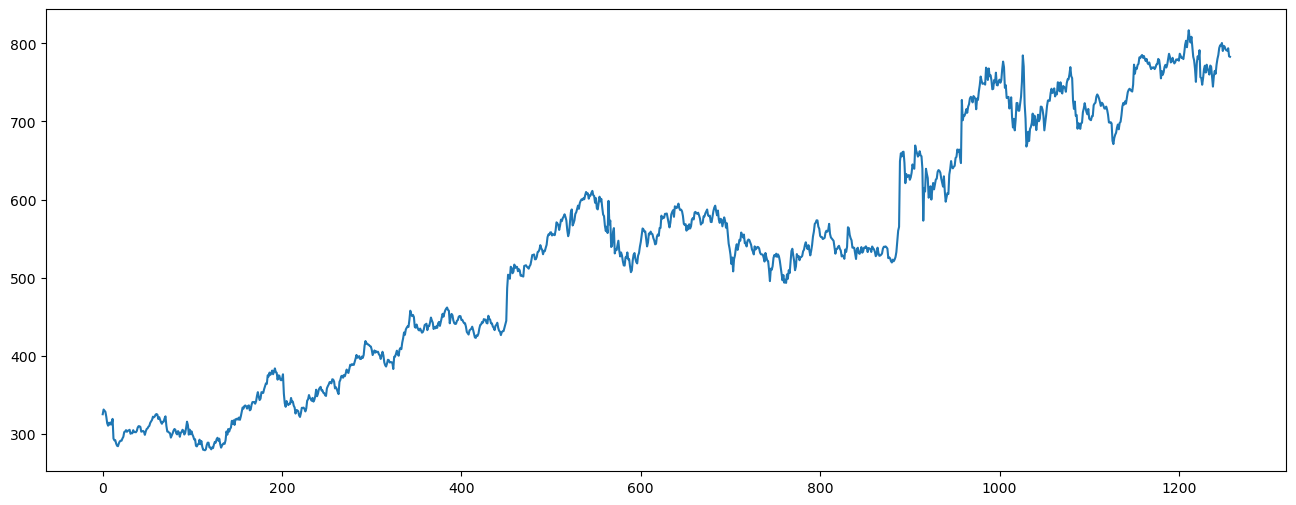

In [5]:
train['Open'].plot(figsize=[16,6])

<Axes: >

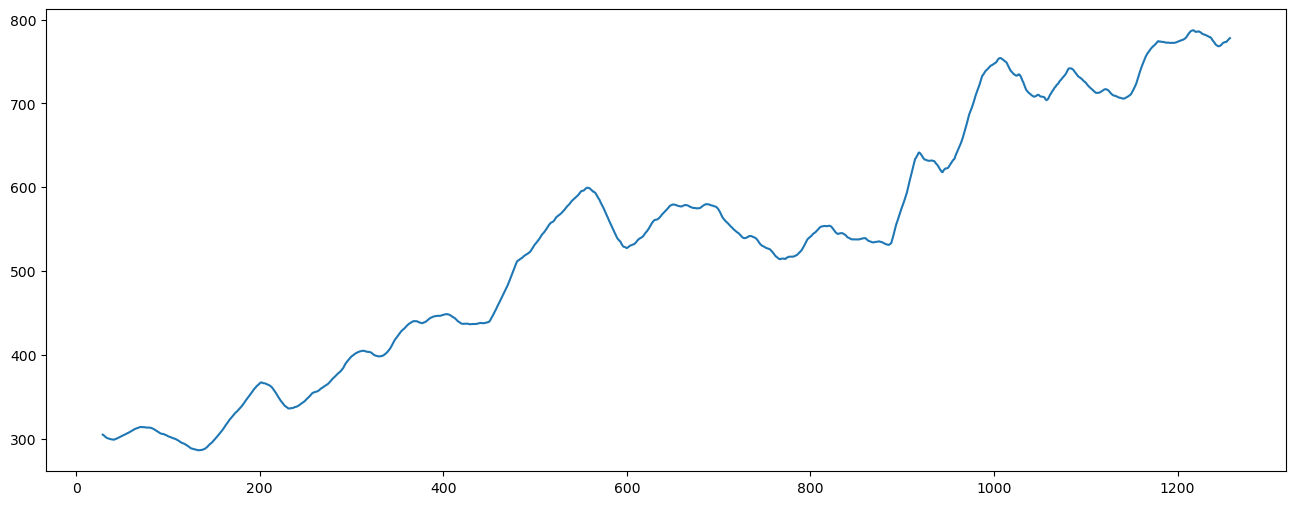

In [6]:
train['Open'].rolling(window=30).mean().plot(figsize=[16,6])

In [7]:
sc = MinMaxScaler()

train_scaled = sc.fit_transform(train[['Open']])

# create a dataset with 60 timestamps and one feature
X_train = []
y_train = []
for i in range(60, train_scaled.shape[0]):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape, y_train.shape)

(1198, 60) (1198,)


In [8]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=20, batch_size=30)

regressor.summary()

2024-10-30 13:11:43.446672: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-30 13:11:43.446708: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-30 13:11:43.446715: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-30 13:11:43.446732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-30 13:11:43.446744: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/garrinshieh/anaconda3/envs/FINA4390/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When u

Epoch 1/20


2024-10-30 13:11:44.286329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0950
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0060
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0040
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0043
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0038
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0038
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0039
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0036
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0033
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0033
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0034
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0030
Epoch 13/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0033
Epoch 14/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0030
Epoch 15/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0031
Epoch 16/20
40/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [9]:
test = test[['Open']]

data_all = pd.concat([train['Open'], test['Open']], axis=0)
inputs = data_all[len(data_all) - len(test) - 60:].values
inputs = inputs.reshape(-1, 1)
print(inputs.shape)

(80, 1)
